# Medical Appointment No-Shows

## 1. Import Libraries

We load all the required libraries for reading .csv file, exploratory data analysis, visualization and data modeling in the below cell.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os # manipulate paths
from datetime import date # supplies classes for manipulating dates
from time import strftime # convert time to a string as specified by the format argument

from sklearn.preprocessing import LabelEncoder # encode target labels with value between 0 and n_classes-1.
from sklearn import ensemble # provides methods for both classification and regression
from sklearn.ensemble import GradientBoostingClassifier # gradient boosted decision tree classifier

from sklearn.metrics import accuracy_score # function that computes the accuracy of correct predictions of the model

from sklearn.model_selection import train_test_split # this splits data into training and test set

import matplotlib.pyplot as plt # to create visualisations
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Load and Read the Data

We load the data in a pandas dataframe called df and return the name of each columns.

In [2]:
# input data file is available in the "../input/" directory.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [3]:
# read the data
df = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')

In [4]:
# print the columns names for each dataset
print("df columns:",list(df))

df columns: ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


## 3. Basic Date Information

This section will provide basic informtion about the data: 

In [5]:
# print the number of rows and columns
print("df shape:",df.shape)

df shape: (110527, 14)


In [6]:
# print the basic information: missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data has no missing values.

In [7]:
# print a summary of the data in df
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In the table above, the first number, the count, shows how many rows have non-missing values. In this instance, we have no missing values.

The second value is the mean, which is the average. Patients in df are on average 37 years old. Under that, std is the standard deviation, which measures how numerically spread out the values are, in other word it tell how close to the mean the datpoints are.

The column Age has a minimum age of -1 which is erronous data, likewise,the maximum age is 115 years old which seems very high as Brazil's life expectancy for 2020 is 77 years old (please see [here](https://www.worldometers.info/demographics/brazil-demographics/#median-age)). We will deal with these errors in next section.

The column Handcap should be binary (True or False) but it has a max value of 4. This will need to be investigated,

In [8]:
# print unique values for each columns
print('Values in Gender:', df.Gender.unique())
print('Values in Neighbourhood:',df.Neighbourhood.unique())
print('Values in Scholarship:',df.Scholarship.unique())
print('Values in Hypertension:',df.Hipertension.unique())
print('Values in Diabetes:',df.Diabetes.unique())
print('Values in Alcoholism:',df.Alcoholism.unique())
print('Values in Handicap:',df.Handcap.unique())
print('Values in SMS_received:',df.SMS_received.unique())
print('Values in No_Show:', df['No-show'].unique())

Values in Gender: ['F' 'M']
Values in Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZ

In [9]:
# print the number of unique values in Neighbourhood
print('Number of unique values in Neighbourhood:',df.Neighbourhood.nunique())

Number of unique values in Neighbourhood: 81


In [10]:
# print the first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 4. Data Cleansing

In this section, we want to amend some columns in df, such as the data type, misspellings and erronous data:

* PatientId is currently a float, it will be converted it into an integer
* ScheduledDay and AppointmentDay are currently objects, it will be converted them into datetime
* AppointmentDay's time will be dropped (as it is set as 00:00:00)
* Misspelled columns are going to be renamed
* Erronous data from the Age column will be deleted

In [11]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay from 'object' type to 'datetime'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).astype('datetime64[ns]')

# Convert AppointmentDay from 'object' type to 'datetime' and drop the unecessary times
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# rename the columns
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_Show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [12]:
# change all the Handicap set above 0 as 1
df.loc[df.Handicap > 0, 'Handicap'] = 1
# check
print('Values in Handicap:',df.Handicap.unique())

Values in Handicap: [0 1]


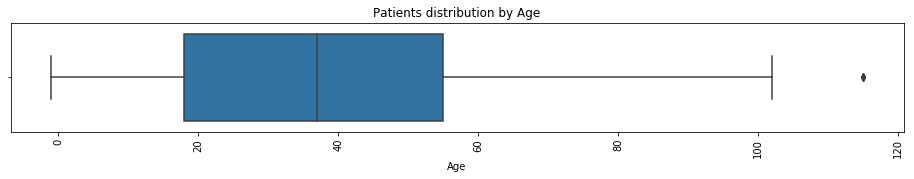

In [13]:
# Look at the distribution of the Age feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Age)
dist_age.set_title("Patients distribution by Age")
plt.show()

Most the patients are between 18 and 55 years old. The patients who are 115 years old are outliars, we will therefore drop these rows as well as the row of the patients aged -1.

In [14]:
# delete patients that are over 102
df = df.drop(df[df.Age > 102].index)
# delete the patients that are negative
df = df.drop(df[df.Age < 0].index)

## 5. Exploratory Data Analysis

### 5.1 Overview of No-Show

In [15]:
# check the total percentage of no show
pd.DataFrame(df.groupby('No_Show')['PatientId'].count()).apply(lambda x : x / sum(x) * 100)

,PatientId
No_Show,
No,79.808362
Yes,20.191638


Missed appointmemts account for 20% of the total appointments in the dataset.

### 5.2 Finding Duplicates

In [16]:
# check for duplicated rows
dups = df[df.duplicated() == True].count()

# check for duplicated patients
dups_id = df['PatientId'][df['PatientId'].duplicated() == True].count()

print('Duplicated rows: ', dups.sum())
print('Duplicated patient ids: ', dups_id)

Duplicated rows:  0
Duplicated patient ids:  48225


The dataset does not have duplicated appointments but has 48,228 patients that can be considered as returning/known patients.

### 5.3 Convert Integer to Boolean

Columns Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received and No_Show should be binary data set as 0 for False and 1 for True

In [17]:
# Scholarship
df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x==1 else False)
# Hypertension
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x==1 else False)
# Diabetes
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x==1 else False)
# Handicap
df['Handicap'] = df['Handicap'].apply(lambda x: True if x==1 else False)
# Alcoholism
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x==1 else False)
# SMS_received
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x==1 else False)
# No_Show
df['No_Show'] = df['No_Show'].apply(lambda x: True if x=='Yes' else False)

### 5.4 Age

In [18]:
# create age groups using the distribution plotted in section 4
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.groupby(['AgeGroup'])['PatientId'].count()

AgeGroup
Less than 10    17475
10-18           11391
19-25            9733
26-35           14404
36-45           14582
46-55           15437
56-65           14203
More than 65    13296
Name: PatientId, dtype: int64

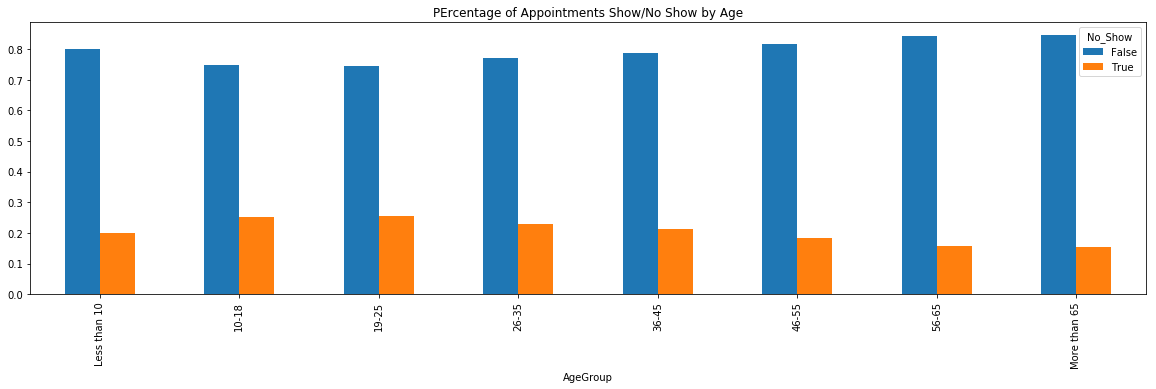

In [19]:
# appointment attendance by age
age = df.groupby('AgeGroup')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
age.set_title("PErcentage of Appointments Show/No Show by Age")
plt.show()

The patients that seems most likely to not show-up for their appointments are between 10 and 35 years old.

### 5.5 Gender

In [20]:
# table with the gender and the number of patient that missed or attended their appointment
gender_tbl = pd.DataFrame(df.groupby(['Gender','No_Show'])['PatientId'].count()).reset_index()
gender_tbl

,Gender,No_Show,PatientId
0,F,False,57243
1,F,True,14591
2,M,False,30962
3,M,True,7725


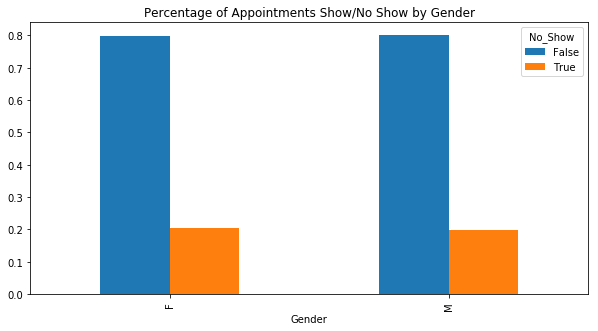

In [21]:
# appointment attendance by gender
gender = df.groupby('Gender')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Percentage of Appointments Show/No Show by Gender")
plt.show()

From the table above, we can clearly see that 'Female' patients usually have more appointments that 'Male' patients, they also have about the double number of missed appointment. However, looking at the percentage of missed appointments by gender shows that it is almost the same rate (about 20%). Therefore, gender does not seem to be an important feature. 

### 5.6 Scheduled Day

#### Looking at the time of the booking

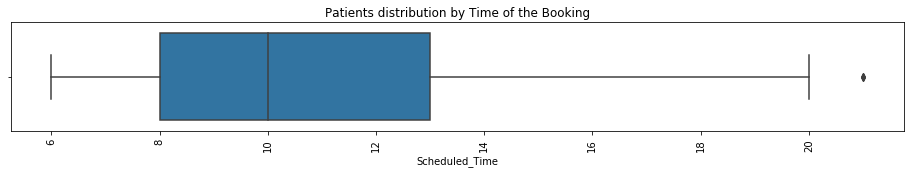

In [22]:
# split ScheduledDay to get the time of the booking stored in Scheduled_Time
df['Scheduled_Time'] = pd.to_datetime(df['ScheduledDay']).dt.hour

# Look at the distribution of Scheduled_Time
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Scheduled_Time)
dist_age.set_title("Patients distribution by Time of the Booking")
plt.show()

The booking are made between 6am and 8pm. There are three bookings that have been taken at 9pm, although these are showed as outliars on the plot above, they will not be dropped as they could be the results of emergencies.

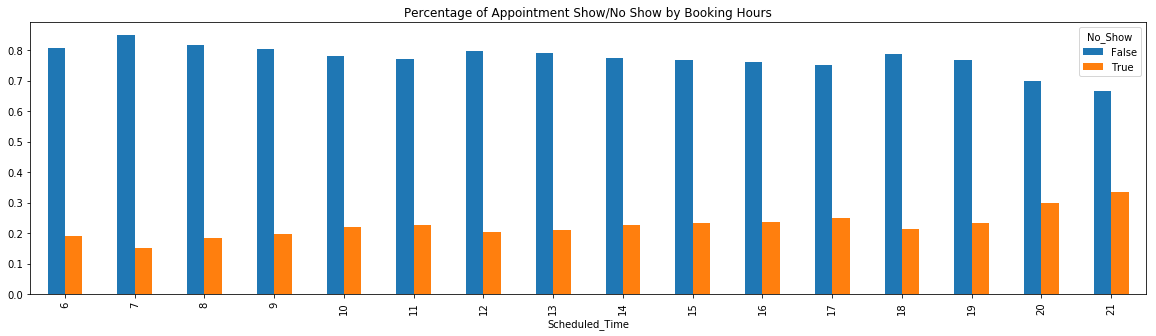

In [23]:
# barchart showing percentage of show/ no-show by hours
appt_h = df.groupby('Scheduled_Time')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
appt_h.set_title("Percentage of Appointment Show/No Show by Booking Hours")
plt.show()

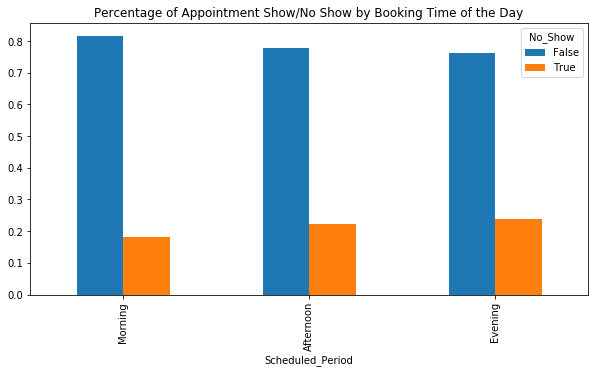

In [24]:
# create three groupes for morning, afternoon and evening appointments
bins= [6,11,17,22]
labels = ['Morning','Afternoon','Evening']
df['Scheduled_Period'] = pd.cut(df['Scheduled_Time'], bins=bins, labels=labels, right=False)

# barchart showing percentage of show/ no-show by time of the day
appt_tod = df.groupby('Scheduled_Period')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
appt_tod.set_title("Percentage of Appointment Show/No Show by Booking Time of the Day")
plt.show()

Morning bookings seem less likely to be missed than afternoon and evening ones.

#### Looking at the day of booking

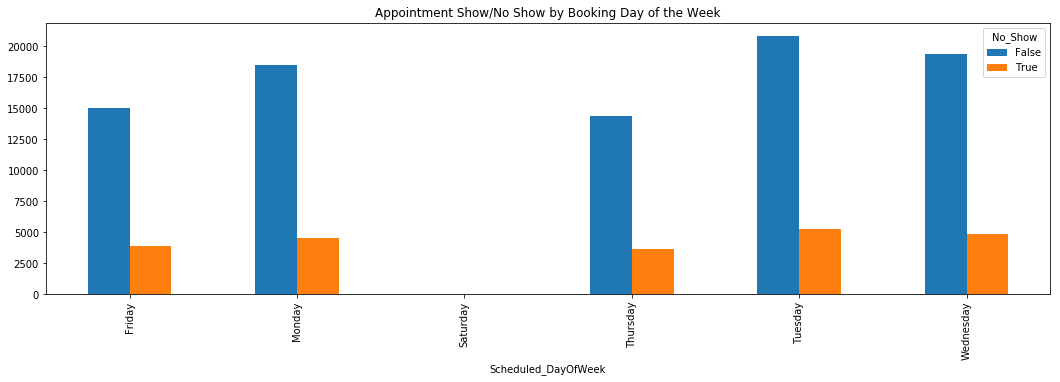

In [25]:
# split ScheduledDay into days of the week
df['Scheduled_DayOfWeek'] = pd.to_datetime(df['ScheduledDay']).dt.day_name()

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Scheduled_DayOfWeek')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Booking Day of the Week")
plt.show()

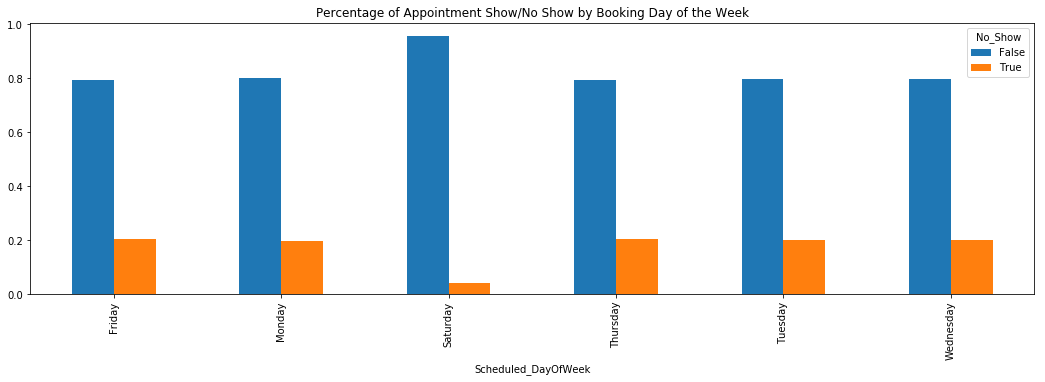

In [26]:
# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Scheduled_DayOfWeek')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Booking Day of the Week")
plt.show()

Most of the bookings are at the beginning of the week, this may be explained because the medical centre seems not to be open over the weekends. Althoug Saturdays have the smallest no show rate, they also represents a too small proportion of the data to be significant. Overall, the days of the week do not seem to be an important feature.

### 5.7 Appointment Date

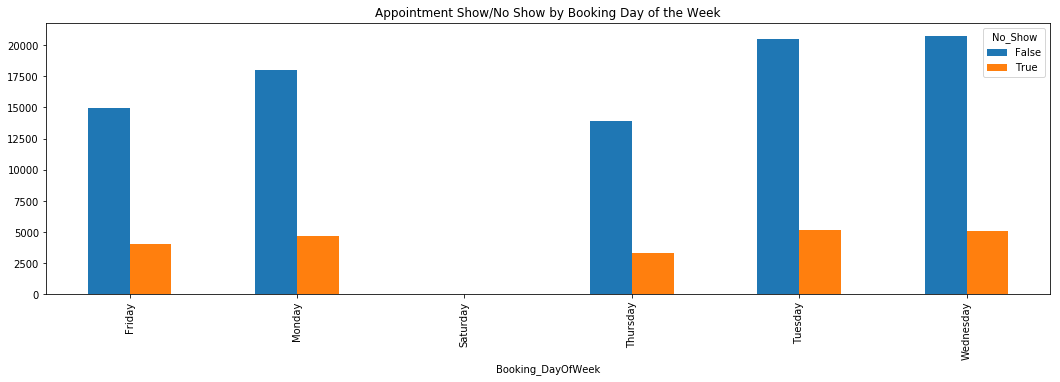

In [27]:
# split ScheduledDay into days of the week
df['Booking_DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Booking_DayOfWeek')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Booking Day of the Week")
plt.show()

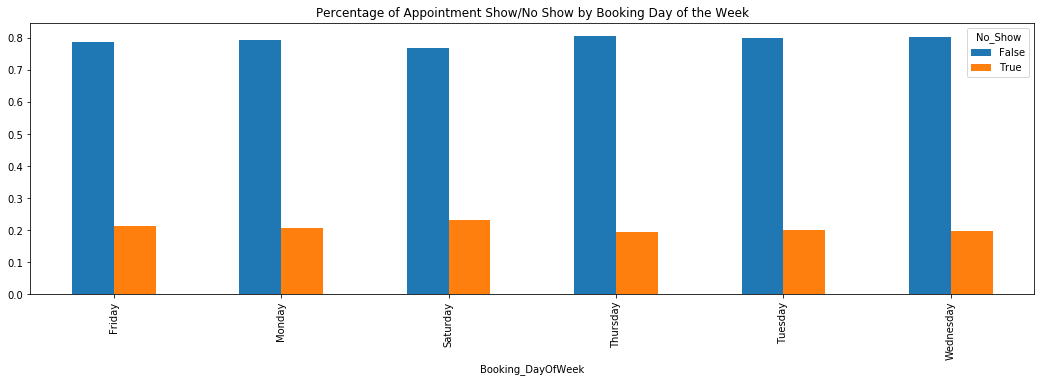

In [28]:
# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Booking_DayOfWeek')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Booking Day of the Week")
plt.show()

The first graph follows the same patterns as section 5.6 "Appointment Show/No Show by Booking Day of the Week" graph. This may be because patient book and have their their appointment on the same day. The percentage of show vs no show dis roughly the same accross the week.

### 5.8 Waiting Time Between Booking and Medical Appointment

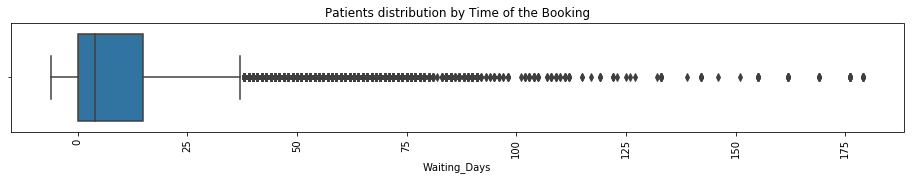

In [29]:
# calculate the number of days the booking has been taken before the appointmenet
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

df['Waiting_Days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Look at the distribution of Waiting_Days
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Waiting_Days)
dist_age.set_title("Patients distribution by Time of the Booking")
plt.show()

Most of the appointments are taken a month in advance. The graph above, highlights erroneous data and outliars. The negative data will be transformed into 'unknown' wating time category while the outliars will be kept as some medical appointment can take up to six months (like small surgeries).

In [30]:
# create pre-appointment period groups using the distribution above
bins= [0,1,7,14,21,28,35,200]
labels = ['Same day','Less than a week','A week','Two weeks','Three weeks','A month','More than a month']
df['Pre_Appt_Period'] = pd.cut(df['Waiting_Days'], bins=bins, labels=labels, right=False)
# replace missing and erronous values with unknown
df['Pre_Appt_Period'] = df['Pre_Appt_Period'].cat.add_categories('unknown').fillna('unknown')

df.groupby(['Pre_Appt_Period'])['PatientId'].count()

Pre_Appt_Period
Same day             38561
Less than a week     27277
A week               14018
Two weeks             9925
Three weeks           6859
A month               6229
More than a month     7647
unknown                  5
Name: PatientId, dtype: int64

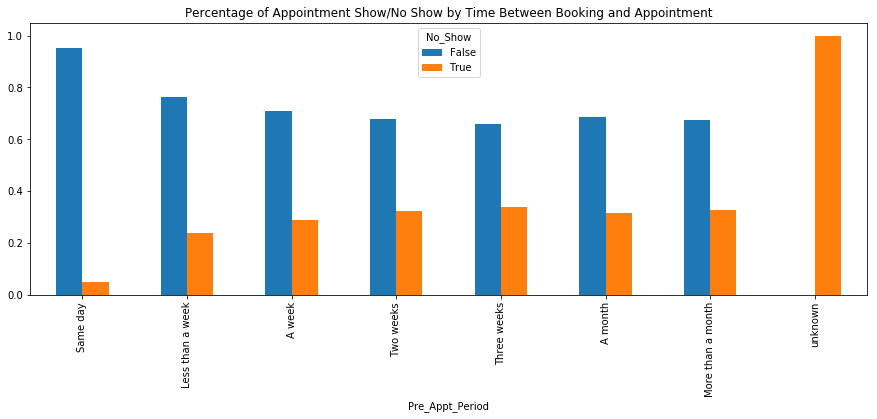

In [31]:
# barchart showing number of show/ no-show in percentage by the amount of time between booking and appointment
psla = df.groupby('Pre_Appt_Period')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,5))
psla.set_title("Percentage of Appointment Show/No Show by Time Between Booking and Appointment")
plt.show()

The graph above suggests that the longer the waiting time is between booking and the appointmnet the more likely the appointment is to be missed. This feature seems to be an important one as it shows a clear distinction for patients show/ no show depending on the number of days ahead of the appontment patients have booked.

### 5.9 Neighbourhood

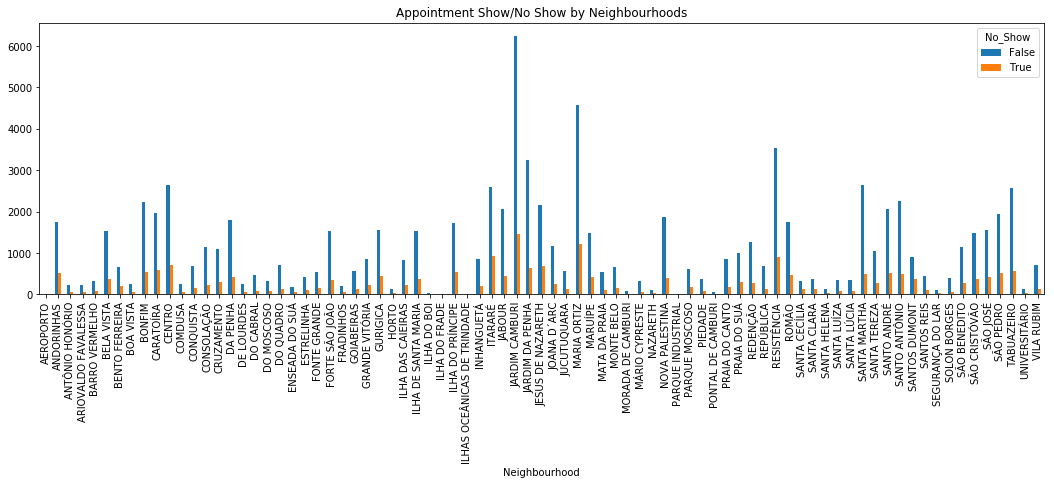

In [32]:
# barchart showing number of show/ no-show by Neighbourhoods
day_of_week = df.groupby('Neighbourhood')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Neighbourhoods")
plt.show()

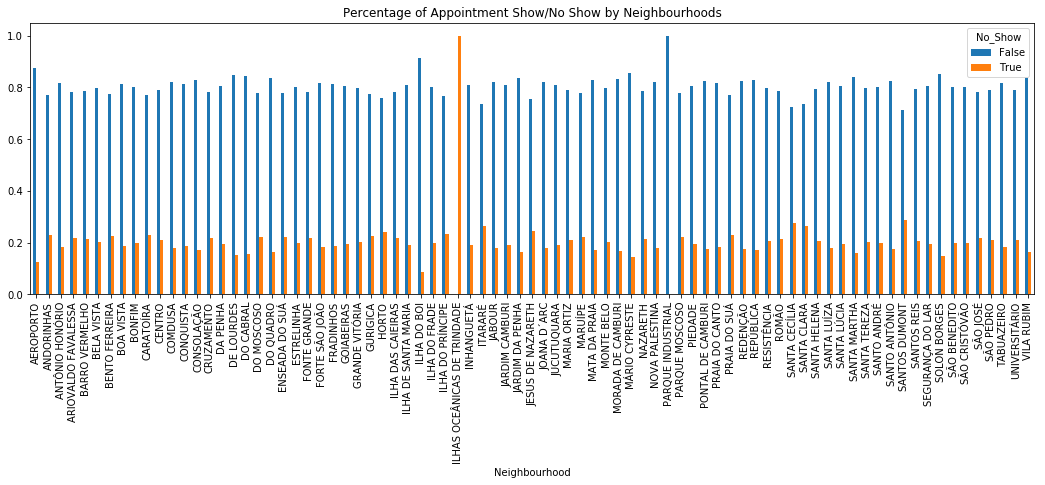

In [33]:
# barchart showing percentage of show/ no-show by Neighbourhoods
day_of_week = df.groupby('Neighbourhood')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Neighbourhoods")
plt.show()

Most of the neighbourhouds have a no show rate of about 20%, the significant drops and peaks are because of the porr representation of a particalar neigbourhood in the dataset rather than because it is significant. Therefre, this feature does not seem to be important for the no show prediction.

### 5.10 Scholarship

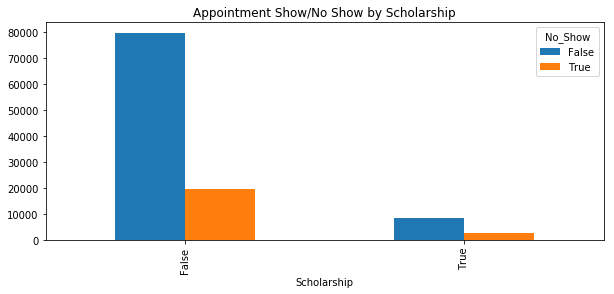

In [34]:
# barchart showing number of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Scholarship")
plt.show()

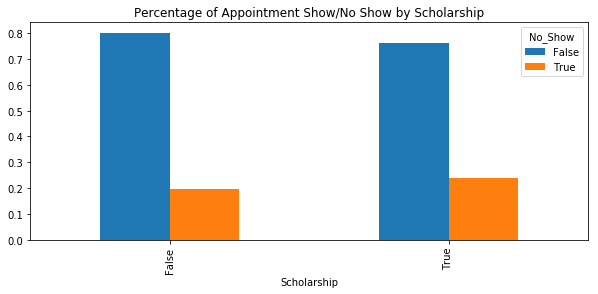

In [35]:
# barchart showing the percentage of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Scholarship")
plt.show()

The graphs above shows that 80% of the patients that do not have a scholarship attended their appointent while 75% of the patient with a scholarship attended. This feature could be helpful in dertermining the no show.

### 5.11 Hypertension

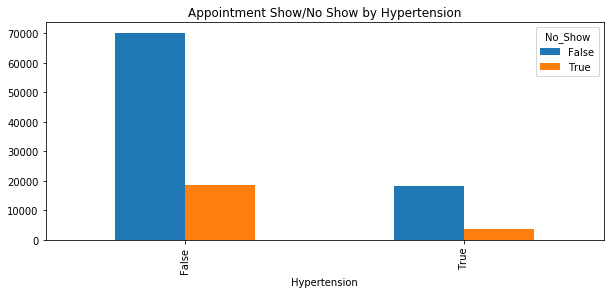

In [36]:
# barchart showing number of show/ no-show by Hypertension
day_of_week = df.groupby('Hypertension')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Hypertension")
plt.show()

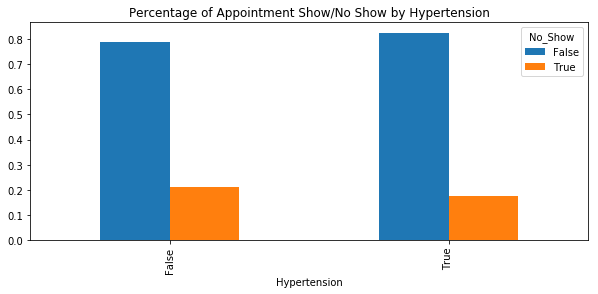

In [37]:
# barchart showing the percentage of show/ no-show by Hypertension
day_of_week = df.groupby('Hypertension')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Hypertension")
plt.show()

The patients suffering from hypertension tend to attend their appointment more often than those who do not have this condition. However, appointment with hypertension patients represent a small pool in our dataset, just under 20% of the total appointments. This feature could be helpful in dertermining the no show.

### 5.12 Diabetes

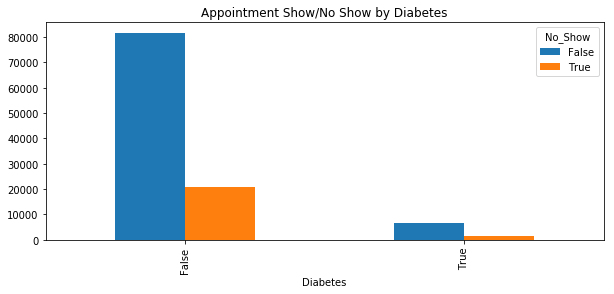

In [38]:
# barchart showing number of show/ no-show by Diabetes
day_of_week = df.groupby('Diabetes')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Diabetes")
plt.show()

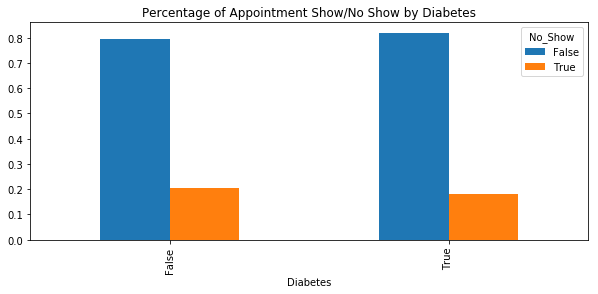

In [39]:
# barchart showing the percentage of show/ no-show by Diabetes
day_of_week = df.groupby('Diabetes')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Diabetes")
plt.show()

The patients suffering from Diabetes tend to attend their appointment more often than those who do not have this condition. This feature may not be helpful in dertermining the no show.

### 5.13 Alcoholism

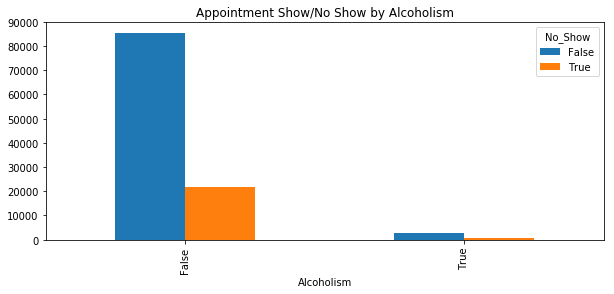

In [40]:
# barchart showing number of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Alcoholism")
plt.show()

Patients who suffer from alcoholism represent only 3% of all the appointments.

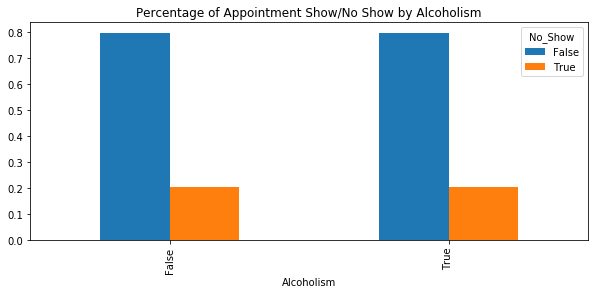

In [41]:
# barchart showing the percentage of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Alcoholism")
plt.show()

Looking at the graph above, there does not seem to be a difference between the patient suffering from alcoholism and the rest of the dataset. This feature may not be helpful in dertermining the no show.

### 5.14 Handicap

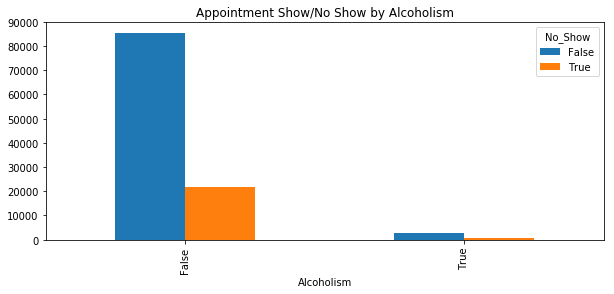

In [42]:
# barchart showing number of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Alcoholism")
plt.show()

Patients suffering from a handicap represent 2% of the total appointments.

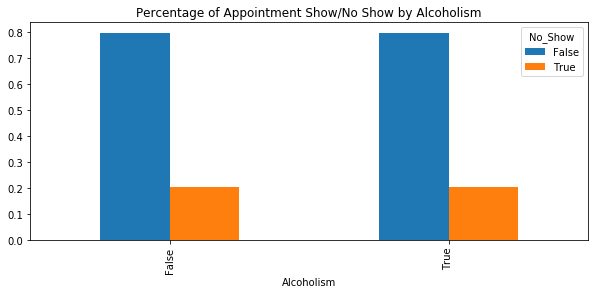

In [43]:
# barchart showing the percentage of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Alcoholism")
plt.show()

Looking at the graph above, there does not seem to be a difference between the patient suffering from handicap and the rest of the dataset. This feature may not be helpful in dertermining the no show.

### 5.15 SMS Received

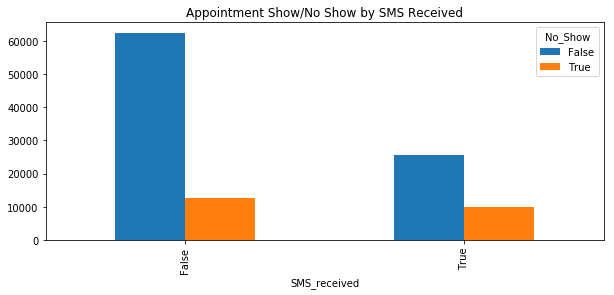

In [44]:
# barchart showing number of show/ no-show by SMS Received
day_of_week = df.groupby('SMS_received')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by SMS Received")
plt.show()

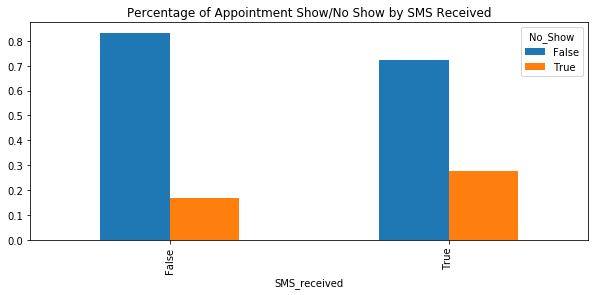

In [45]:
# barchart showing the percentage of show/ no-show by SMS Received
day_of_week = df.groupby('SMS_received')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by SMS Received")
plt.show()

The graphs above do not show expected results: 38% appointments for patients that received the sms were missed while 20% of the appointments for patients that did not received a sms. This feature seem to be important in dertermining appointments no show.

## 6. Creating a Model for Appointments No Show

In [46]:
data = df.copy().reset_index()

### 6.1 Selecting the Prediction Target

This is the variable that we are trying to predict.

In [47]:
y = data.No_Show

### 6.2 Feature Selection

In [48]:
X = data[['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension','Diabetes', 
        'Alcoholism', 'Handicap', 'SMS_received', 'AgeGroup', 'Scheduled_Time', 
        'Scheduled_Period', 'Waiting_Days', 'Pre_Appt_Period']]

### 6.3 Feature Engineering

In [49]:
# label encoding
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Neighbourhood'] = le.fit_transform(X['Neighbourhood'])
X['AgeGroup'] = le.fit_transform(X['AgeGroup'])
X['Scheduled_Period'] = le.fit_transform(X['Scheduled_Period'])
X['Pre_Appt_Period'] = le.fit_transform(X['Pre_Appt_Period'])

In [50]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,AgeGroup,Scheduled_Time,Scheduled_Period,Waiting_Days,Pre_Appt_Period
0,0,62,39,False,True,False,False,False,False,5,18,1,0,4
1,1,56,39,False,False,False,False,False,False,5,16,0,0,4
2,0,62,45,False,False,False,False,False,False,5,16,0,0,4
3,0,8,54,False,False,False,False,False,False,6,17,1,0,4
4,0,56,39,False,True,True,False,False,False,5,16,0,0,4


### 6.4 Build the model

#### Split de Data

In [51]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(82890, 14) (82890,)
(27631, 14) (27631,)


#### Gradient Boosting classifier

In [52]:
# Create a for loop to test different n-estimators with loss set as ‘deviance’ refering to logistic regression for classification

ac_dev_gbc = {}

for i in range(200,2000,200):
    params = {'n_estimators': i,
              'max_depth': 4, 
              'min_samples_split': 2,
              'learning_rate': 0.01,
              'loss': 'deviance',
              'random_state': 101}
    gbc = ensemble.GradientBoostingClassifier(**params)
    # fit the model
    gbc.fit(X_train, y_train)
    # predict no show
    gbc_predictions = gbc.predict(X_test)
    # calculate the accuracy score
    ac_dev_gbc[i] = accuracy_score(y_test, gbc_predictions)

ac_dev_gbc

{200: 0.8000434294813796,
 400: 0.8001158119503456,
 600: 0.8004777242951757,
 800: 0.8006586804675907,
 1000: 0.8007672541710398,
 1200: 0.8006586804675907,
 1400: 0.8002605768882777,
 1600: 0.8000072382468966,
 1800: 0.8003329593572437}

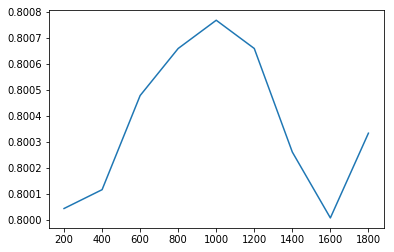

In [53]:
# plot the results
plt.plot(ac_dev_gbc.keys(), ac_dev_gbc.values())

The best score occurs at n_estimators = 1000, therefore we are choosing it as our parameter.

#### Final Model

In [54]:
# fit the final model using the best accuracy score produced in the for loop
final_params = {'n_estimators': 1000, 
                'max_depth': 4, 
                'min_samples_split': 2,
                'learning_rate': 0.01, 
                'loss': 'deviance',
                'random_state': 101}
final_gbc = ensemble.GradientBoostingClassifier(**final_params)

final_gbc.fit(X_train, y_train)

# predict no show
final_gbc_predictions = final_gbc.predict(X_test)

# calculate the accuracy score
final_ac_gbc = accuracy_score(y_test, final_gbc_predictions)

print("Accuracy Score:" , final_ac_gbc)

Accuracy Score: 0.8007672541710398


#### Feature Importance

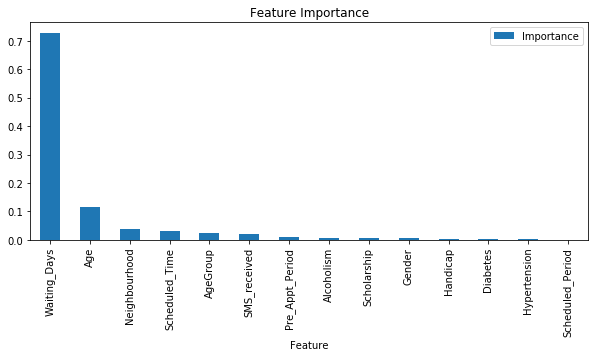

In [55]:
importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': final_gbc.feature_importances_}).set_index('Feature').sort_values('Importance',ascending=False)

# plot the importances
importances = importances.plot(kind='bar', figsize=(10,4))
importances = importances.set_title("Feature Importance")
plt.show()

The most important feature in predicting no show for appointments are the number of days between the booking and the appointment, the patient's age, the neighbourhood.

#### Create an output

In [56]:
# Link the results back to a patient and save
patients = df['PatientId']
output = pd.DataFrame({'Actual': y_test,
                       'Final Predictions': final_gbc_predictions})
output = pd.merge(output, patients, left_index=True, right_index=True)
output.head()

,Actual,Final Predictions,PatientId
29415,False,False,543433819342712
65919,False,False,53548577956841
37876,False,False,939897224313925
56689,False,False,112974733865223
76328,False,False,773287125519756
